In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket, pickle, joblib
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%autosave 120

Autosaving every 120 seconds


## <font color='blue'>1. 【Read / Load Data】</font>

### <font color=#9400d3>[California Housing Data](https://www.kaggle.com/dhirajnirne/california-housing-data)</font>
<br>

Independent Variables:
* longitude : It is said that the value of houses in the west is higher.
* latitude : It is said that the value of the house in the north is higher.
* housing_median_age : Average age of houses in a neighborhood; lower numbers are newer houses.
* total_rooms : Total number of rooms in a block. I think the so-called "room" here includes non-bedroom spaces such as the living room, which can tell the size of the house.<
* total_bedrooms : Total number of bedrooms in a block.
* population : Total number of people living in a block.
* households : Total number of households in a block.
* median_income : Median income of households in a neighborhood (in tens of thousands of dollars).
* ocean_proximity : Whether the house has an ocean view.

Dependent Variable:
* median_house_value : Median house value (in USD) of households in a neighborhood.</font>

### <font color=#9400d3> 1-1 Read Data </font>

In [2]:
fname1 = r"D:\py 練習\data\housing.csv"
houses = pd.read_csv(fname1,sep=',',engine='python',encoding='utf-8')
houses.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [40]:
print(houses.shape)

(20640, 10)


In [41]:
print(houses.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### <font color=#9400d3> 1-2 Delete Missing values </font>

In [3]:
houses.dropna(axis=0, how='any', subset=['total_bedrooms'], inplace=True)   

# The number of samples is large enough, so I decided to delete the row with missing value directly.

In [43]:
print(houses.shape)

(20433, 10)


In [44]:
print(houses.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### <font color=#9400d3> 1-3 some processing that I think is necessary </font>

#### <font color=#9400d3> 1-3-1.  Unify the dollar units of median_income & median_house_value </font>

In [4]:
houses.median_income = houses['median_income']*10000

# The unit of median_house_value is US$1, and the unit of median_income is US$10,000. 
# For the convenience of explanation later, adjust the median_income to 1 US dollar as the unit.

In [47]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20433.0,35.633221,2.136348,32.54,33.93,34.26,37.72,41.95
housing_median_age,20433.0,28.633094,12.591805,1.00,18.00,29.00,37.00,52.00
total_rooms,20433.0,2636.504233,2185.269567,2.00,1450.00,2127.00,3143.00,39320.00
total_bedrooms,20433.0,537.870553,421.385070,1.00,296.00,435.00,647.00,6445.00
population,20433.0,1424.946949,1133.208490,3.00,787.00,1166.00,1722.00,35682.00
households,20433.0,499.433465,382.299226,1.00,280.00,409.00,604.00,6082.00
median_income,20433.0,38711.616013,18992.912493,4999.00,25637.00,35365.00,47440.00,150001.00
median_house_value,20433.0,206864.413155,115435.667099,14999.00,119500.00,179700.00,264700.00,500001.00


####  <font color=#9400d3> 1-3-2. total_rooms & total_bedrooms </font>

In [62]:
# Two variables should be dealt with, because what I need is "total number of rooms per house" vs "total number of bedrooms per room". So I assume that one household has one room, and then divide it by households.

print((houses["total_rooms"]/houses["households"]).describe().T)         # looks normal.
print((houses["total_bedrooms"]/houses["households"]).describe().T)      # It seems weird, it can't be possible that each room has only one bedroom?!

count    20433.000000
mean         5.431344
std          2.482946
min          0.846154
25%          4.441441
50%          5.230769
75%          6.052381
max        141.909091
dtype: float64
count    20433.000000
mean         1.097062
std          0.476104
min          0.333333
25%          1.006029
50%          1.048889
75%          1.099631
max         34.066667
dtype: float64


In [63]:
# Otherwise use "total_bedrooms/total_rooms". The value can also reflect the average number of bedrooms in the block.

print((houses["total_bedrooms"]/houses["total_rooms"]).describe().T) 

count    20433.000000
mean         0.213039
std          0.057983
min          0.100000
25%          0.175427
50%          0.203162
75%          0.239821
max          1.000000
dtype: float64


In [5]:
houses["total_bedrooms"] = houses["total_bedrooms"]/houses["total_rooms"]
houses["total_rooms"] = houses["total_rooms"]/houses["households"]

In [65]:
houses.describe().T   

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20433.0,35.633221,2.136348,32.540000,33.930000,34.260000,37.720000,41.950000
housing_median_age,20433.0,28.633094,12.591805,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20433.0,5.431344,2.482946,0.846154,4.441441,5.230769,6.052381,141.909091
total_bedrooms,20433.0,0.213039,0.057983,0.100000,0.175427,0.203162,0.239821,1.000000
population,20433.0,1424.946949,1133.208490,3.000000,787.000000,1166.000000,1722.000000,35682.000000
households,20433.0,499.433465,382.299226,1.000000,280.000000,409.000000,604.000000,6082.000000
median_income,20433.0,38711.616013,18992.912493,4999.000000,25637.000000,35365.000000,47440.000000,150001.000000
median_house_value,20433.0,206864.413155,115435.667099,14999.000000,119500.000000,179700.000000,264700.000000,500001.000000


####  <font color=#9400d3> 1-3-3. Move the dependent variable median_house_value to the last column </font>

In [6]:
houese_ = houses['ocean_proximity']
houses = houses.drop('ocean_proximity', axis=1)
houses.insert(8, 'ocean_proximity', houese_)
houses.head(3)                                     

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,6.984127,0.146591,322.0,126.0,83252.0,NEAR BAY,452600.0
1,-122.22,37.86,21.0,6.238137,0.155797,2401.0,1138.0,83014.0,NEAR BAY,358500.0
2,-122.24,37.85,52.0,8.288136,0.129516,496.0,177.0,72574.0,NEAR BAY,352100.0


## <font color='blue'>2. 【EDA，Exploratory Data Analysis】</font>

###  <font color=#9400d3> 2-1 Continuous variables </font>

####  <font color=#9400d3> 2-1-1. Scatter plot </font>

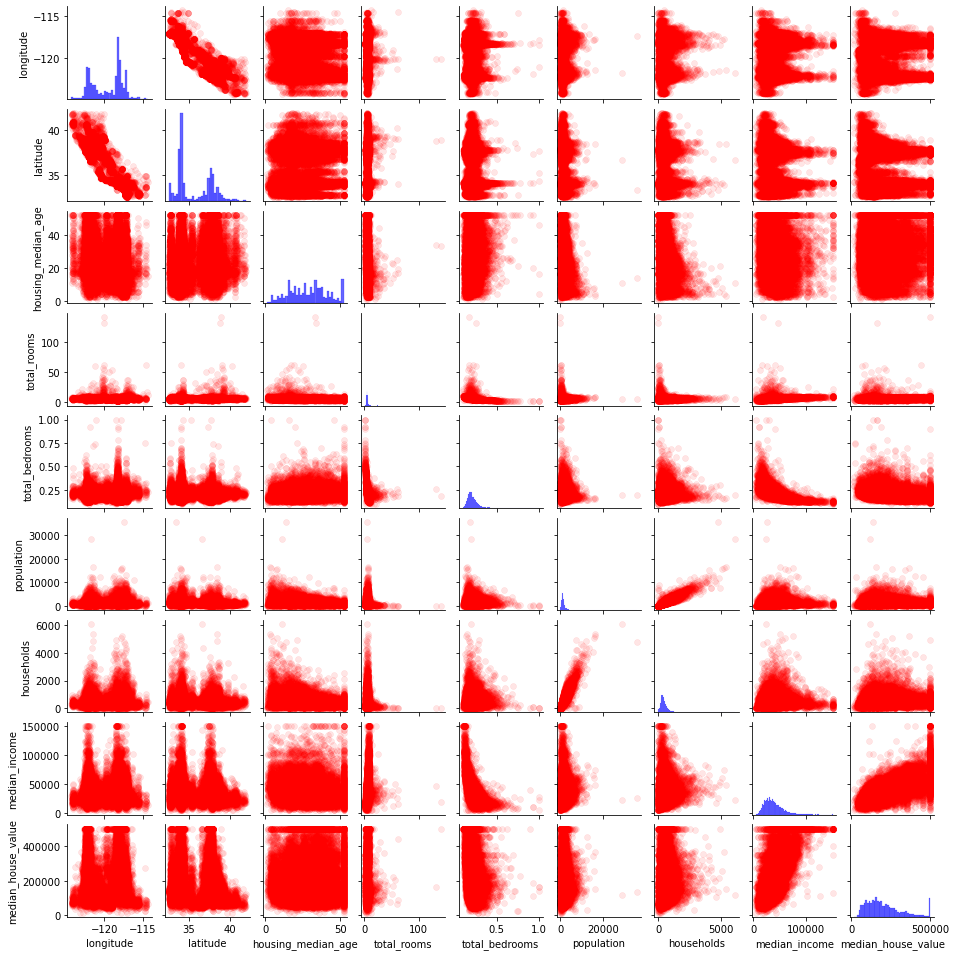

In [46]:
sns.pairplot(houses, height=1.5, 
             plot_kws={'color':'red', 'edgecolor':'red', 'alpha':0.1},      
             diag_kws={'color':'blue', 'edgecolor':'blue', 'alpha':0.6})
plt.show()

####  <font color=#9400d3> 2-1-2. Histogram (for those that look too small in the above plot) </font>

In [6]:
from matplotlib.font_manager import FontProperties  
fontset01 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

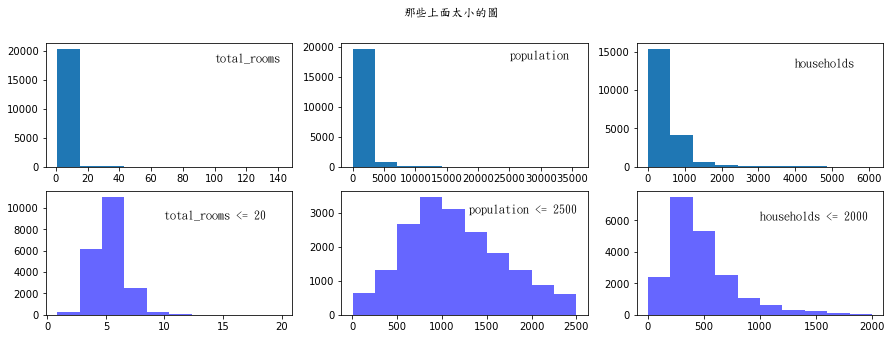

In [70]:
plt.figure(figsize=[15, 5])
plt.suptitle('那些上面太小的圖', fontproperties=fontset01)

plt.subplot(2, 3, 1)
plt.hist(houses['total_rooms'])
plt.text(100, 18000, 'total_rooms', fontproperties=fontset01)
plt.subplot(2, 3, 2)
plt.hist(houses['population'])
plt.text(25000, 18000, 'population', fontproperties=fontset01)
plt.subplot(2, 3, 3)
plt.hist(houses['households'])
plt.text(4000, 13000, 'households', fontproperties=fontset01)

plt.subplot(2, 3, 4)
plt.hist(houses['total_rooms'].loc[(houses['total_rooms'] <= 20)], color='blue', alpha=0.6)
plt.text(10, 9000, 'total_rooms <= 20', fontproperties=fontset01)
plt.subplot(2, 3, 5)
plt.hist(houses['population'].loc[(houses['population'] <= 2500)], color='blue', alpha=0.6)
plt.text(1300, 3000, 'population <= 2500', fontproperties=fontset01)
plt.subplot(2, 3, 6)
plt.hist(houses['households'].loc[(houses['households'] <= 2000)], color='blue', alpha=0.6)
plt.text(1000, 6000, 'households <= 2000', fontproperties=fontset01)

plt.show()

####  <font color=#9400d3> 2-1-3. Continuous Variables - Exploring the Relationship Between House Prices and Home Locations </font>

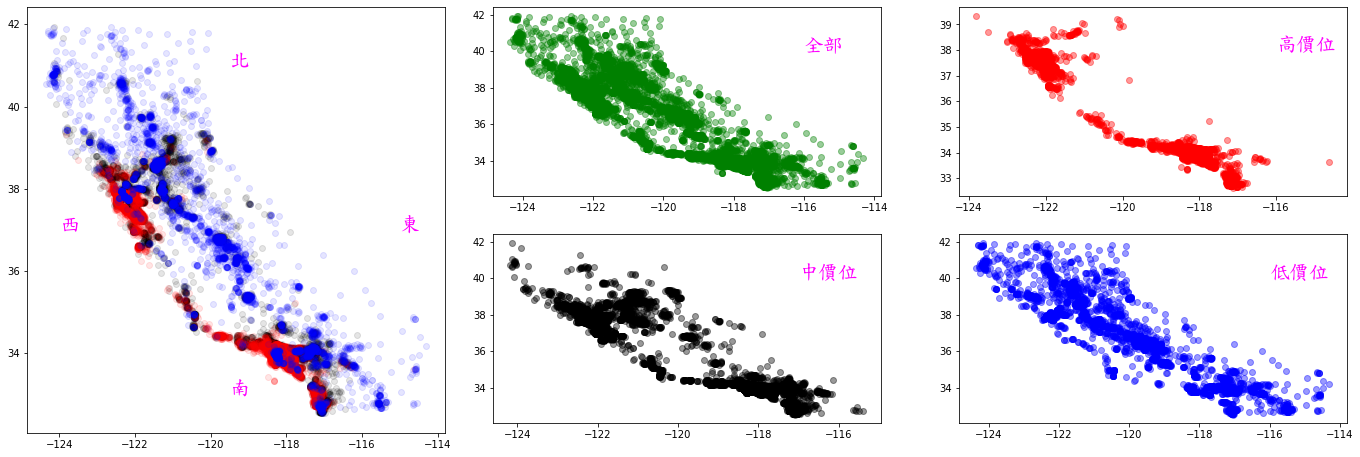

In [86]:
high = houses[houses['median_house_value'] > 264700 ]  # median_house_value Q3 : 264700
med = houses[(houses['median_house_value'] >= 119500) & (houses['median_house_value'] <= 264700)] 
low = houses[houses['median_house_value'] < 119500 ]   # median_house_value Q1 : 119500

plt.figure(figsize=[32, 16])

# All
plt.subplot2grid(shape=(8,8), loc=(0,0), rowspan=4, colspan=2)
plt.plot(med['longitude'], med['latitude'], marker='o', color='black', linestyle='None', alpha=0.1)
plt.plot(high['longitude'], high['latitude'], marker='o', color='red', linestyle='None', alpha=0.1)
plt.plot(low['longitude'], low['latitude'], marker='o', color='blue', linestyle='None', alpha=0.1)
plt.text(-124, 37, '西', fontproperties=fontset01, color='#ff00ff', fontsize=20)
plt.text(-115, 37, '東', fontproperties=fontset01, color='#ff00ff', fontsize=20)
plt.text(-119.5, 33, '南', fontproperties=fontset01, color='#ff00ff', fontsize=20)
plt.text(-119.5, 41, '北', fontproperties=fontset01, color='#ff00ff', fontsize=20)

# All
plt.subplot2grid(shape=(4,4), loc=(0,1), rowspan=1, colspan=1)
plt.plot(houses['longitude'], houses['latitude'], marker='o', color='green', linestyle='None', alpha=0.4)
plt.text(-116, 40, '全部', fontproperties=fontset01, color='#ff00ff', fontsize=20)
# The high-priced houses
plt.subplot2grid(shape=(4,4), loc=(0,2), rowspan=1, colspan=1)
plt.plot(high['longitude'], high['latitude'], marker='o', color='red', linestyle='None', alpha=0.4)
plt.text(-116, 38, '高價位', fontproperties=fontset01, color='#ff00ff', fontsize=20)
# The middle-priced houses
plt.subplot2grid(shape=(4,4), loc=(1,1), rowspan=1, colspan=1)
plt.plot(med['longitude'], med['latitude'], marker='o', color='black', linestyle='None', alpha=0.4)
plt.text(-117, 40, '中價位', fontproperties=fontset01, color='#ff00ff', fontsize=20)
# The low-priced houses
plt.subplot2grid(shape=(4,4), loc=(1,2), rowspan=1, colspan=1)
plt.plot(low['longitude'], low['latitude'], marker='o', color='blue', linestyle='None', alpha=0.4)
plt.text(-116, 40, '低價位', fontproperties=fontset01, color='#ff00ff', fontsize=20)

plt.show()


# Looks like the higher priced houses are located in the Northwest and southeast.
# The distribution of low-priced houses is very wide, but there is less overlap with high-priced houses, and there seems to be a middle-priced house between the two.

####  <font color=#9400d3> 2-1-4. Correlation coefficient table </font>

In [47]:
houses.corr()
# median_house_valu vs median_income : 0.69. Moderately positive correlation, the community with higher income of residents, the housing price of the community will be higher
# median_house_valu vs total_rooms : 0.15. Low positive correlation, the house has more rooms, the house price will rise slightly.
# median_house_valu vs housing_median_age : 0.11，Low positive correlation, the older the house, the house price will increase slightly.
# housing_median_age vs total_rooms : -0.15. Younger houses have fewer rooms, which can explain why older houses are more expensive.
# median_house_valu vs latitude : -0.14. Low negative correlation, the closer the house is to the north, the house price will drop slightly.
# median_house_valu vs total_bedrooms : -0.26. Low negative correlation, a house with a low room ratio is more expensive, and a low room ratio means more other spaces (ex. living room...).

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,-0.027307,0.092657,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,0.106423,-0.113815,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.153031,0.136089,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,-0.027307,0.106423,-0.153031,1.000000,-0.416952,-0.071898,-0.080165,0.325307,0.151344
total_bedrooms,0.092657,-0.113815,0.136089,-0.416952,1.000000,0.035319,0.065087,-0.615661,-0.255880
population,0.100270,-0.108997,-0.295787,-0.071898,0.035319,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,-0.080165,0.065087,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.325307,-0.615661,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.151344,-0.255880,-0.025300,0.064894,0.688355,1.000000


###  <font color=#9400d3> 2-2 Category variables </font>

In [24]:
houses['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

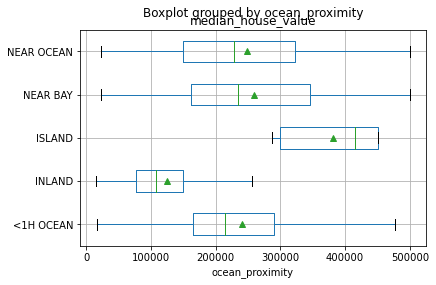

In [12]:
houses.boxplot(column='median_house_value',by='ocean_proximity', 
               showfliers=False,
               showmeans=True,
               meanline=False,
               vert=False)
plt.show()

####  <font color=#9400d3> 2-3 Two-way ANOVA </font>

In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
view = ols('median_house_value ~ C(ocean_proximity)', data=houses).fit()
sm.stats.anova_lm(view, typ=2)

# Because p-values < 0.05, it can be seen that ocean_proximity has a significant impact on median_house_value

,sum_sq,df,F,PR(>F)
C(ocean_proximity),6.478688e+13,4.0,1594.710397,0.0
Residual,2.074776e+14,20428.0,NaN,NaN


## <font color='blue'>3. 【Feature Engineering】</font>

###  <font color=#9400d3> 3-1 Dummy Coding </font>

In [7]:
X = houses.iloc[:,:9]
y = houses.iloc[:,9]

In [8]:
X = pd.get_dummies(X, drop_first=True)

In [57]:
X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.984127,0.146591,322.0,126.0,83252.0,0,0,1,0
1,-122.22,37.86,21.0,6.238137,0.155797,2401.0,1138.0,83014.0,0,0,1,0
2,-122.24,37.85,52.0,8.288136,0.129516,496.0,177.0,72574.0,0,0,1,0


###  <font color=#9400d3> 3-2 Split data set </font>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.2, random_state=123)

###  <font color=#9400d3> 3-3 Since ISLAND has only 5 entries, I decided to put them all in the training data </font>

In [10]:
X[X['ocean_proximity_ISLAND'] == 1] 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8314,-118.32,33.35,27.0,5.060423,0.311045,744.0,331.0,21579.0,0,1,0,0
8315,-118.33,33.34,52.0,5.473318,0.250530,1100.0,431.0,28333.0,0,1,0,0
8316,-118.32,33.33,52.0,7.385417,0.240715,733.0,288.0,33906.0,0,1,0,0
8317,-118.32,33.34,52.0,6.225000,0.265060,341.0,160.0,27361.0,0,1,0,0
8318,-118.48,33.43,29.0,4.138728,0.298883,422.0,173.0,26042.0,0,1,0,0


In [11]:
Z = pd.concat([X, y], axis=1, verify_integrity=True)
z_x = Z[Z['ocean_proximity_ISLAND'] == 1].iloc[:,:12]
z_y = Z[Z['ocean_proximity_ISLAND'] == 1].iloc[:,12]      

# Split ocean_proximity_ISLAND = 1 into two tables of independent variable and dependent variable.

In [12]:
X_train = pd.concat([X_train, z_x], axis=0, verify_integrity=True, ignore_index=True)
y_train = pd.concat([y_train, z_y], axis=0, verify_integrity=True, ignore_index=True)   # Incorporate into training data

## <font color='blue'>4. 【Training / Modeling / Fit】</font>

In [14]:
model = LinearRegression(n_jobs=-1)
model.fit(X=X_train, y=y_train)

LinearRegression(n_jobs=-1)

## <font color='blue'>5. 【Predict】</font>

In [15]:
model.predict(X_test)

array([227720.53703877, 121532.61707382,  87192.00573157, ...,
       242404.48294605, 269635.24152754, 235738.44799837])

## <font color='blue'>6. 【Evaluation】</font>

###  <font color=#9400d3> 6-1 Inspect the created regression model </font>

In [85]:
vars(model)

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': -1,
 'n_features_in_': 12,
 'coef_': array([-2.70730379e+04, -2.58007575e+04,  1.07140801e+03,  3.13751353e+03,
         2.74992569e+05, -3.85838270e+01,  1.26753946e+02,  4.15593941e+00,
        -3.46325367e+04,  1.63425413e+05, -2.75180282e+03,  6.06116870e+03]),
 '_residues': 76195776785524.4,
 'rank_': 12,
 'singular_': array([2.43341000e+06, 1.53188852e+05, 1.99579392e+04, 1.52300711e+03,
        3.66868370e+02, 3.02476158e+02, 7.94073865e+01, 4.19790868e+01,
        3.09464137e+01, 2.91740545e+01, 5.24717927e+00, 2.99348858e+00]),
 'intercept_': -2375651.6128987707}

###  <font color=#9400d3> 6-2 Regression equation </font>
<font color=#9400d3> $\hat y=-2375651.61-27073.04*x_1-25800.76*x_2+1071.41*x_3+3137.51*x_4+274992.57*x_5-38.58*x_6+126.75*x_7+4.16*x_8-34632.54*x_9+163425.41*x_{10}-2751.80*x_{11}+6061.17*x_{12}$</font>
<br>
<font color=#9400d3> 
- $\hat y : $ median house value <br>
- $x_1 : $ longitude <br>
- $x_2 : $ latitude <br>
- $x_3 : $ housing median age <br>
- $x_4 : $ total rooms <br>
- $x_5 : $ total bedrooms <br>
- $x_6 : $ population <br>
- $x_7 : $ households <br>
- $x_8 : $ median income <br>
- $x_9 : $ ocean proximity INLAND <br>
- $x_{10} : $	ocean proximity ISLAND <br>
- $x_{11} : $	ocean proximity NEAR BAY <br>
- $x_{12} : $	ocean proximity NEAR OCEAN
</font>

In [109]:
print(model.coef_)         # coefficients
print(model.intercept_)    # intercept

[-2.70730379e+04 -2.58007575e+04  1.07140801e+03  3.13751353e+03
  2.74992569e+05 -3.85838270e+01  1.26753946e+02  4.15593941e+00
 -3.46325367e+04  1.63425413e+05 -2.75180282e+03  6.06116870e+03]
-2375651.6128987707


###  <font color=#9400d3> 6-3 Comparing Predicted Values to Actual Values - Training data </font>

In [39]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': model.predict(X_train), 
                   'Residues': y_train - model.predict(X_train)})
df.head(3)

,Actual,Predicted,Residues
0,95200.0,163136.053061,-67936.053061
1,92800.0,177129.910050,-84329.910050
2,141000.0,114667.964037,26332.035963


In [31]:
sum(df['Residues'])   # approximately equal to 0

-1.2290198355913162e-05

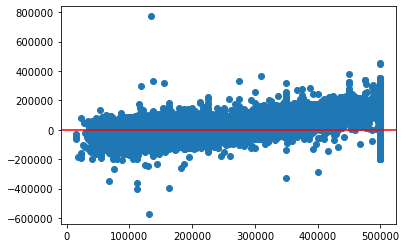

In [52]:
# plot of residuals against dependent variable

plt.plot(df['Actual'], df['Residues'], 'o')
plt.axhline(y=0, xmin=0, xmax=1, color='red')
plt.show()

###  <font color=#9400d3> 6-4 Coefficient Test of Regression Model </font>

In [47]:
from sklearn.feature_selection import f_regression
print(f_regression(X_train, y_train)[1])

# Looks like they are all less than 0.05

[1.77288935e-008 1.45219023e-079 3.84585786e-046 9.64359151e-081
 2.98250547e-243 4.47546969e-004 8.85635803e-016 0.00000000e+000
 0.00000000e+000 2.45349852e-006 9.08984479e-092 6.64543176e-075]


###  <font color=#9400d3> 6-5 Performance of regression model </font>

In [108]:
sse = sum((model.predict(X_train) - y_train) ** 2)
sst = sum((y_train - np.mean(y_train)) ** 2)
mse = np.mean((model.predict(X_train) - y_train) ** 2)
r_squared = model.score(X_train, y_train)
print(f'SSE = {sse}')
print(f'SST = {sst}')
print(f'MSE = {mse}')
print(f'R2 = {r_squared:.2%}')

SSE = 76195776785524.5
SST = 220026946754776.1
MSE = 4660007142.40869
R2 = 65.37%


### <font color='blue'>7. 【Deployment】</font>
- 【Simulation operation steps】
    1. Save the trained model as a joblib file
    2. Restart kernel
    3. Reload joblib file (trained model)
    4. Use the model directly to make predictions (do not retrain)

In [99]:
joblib.dump(model, r'D:\py 練習\data\houses.job')

['D:\\py 練習\\data\\houses.job']

In [7]:
joblib.dump(X_test, r'D:\py 練習\data\X_test.job')

['D:\\py 練習\\data\\X_test.job']

<font color=#9400d3> restart kernel here </font> 

In [1]:
import joblib
model = joblib.load(r'D:\py 練習\data\houses.job')
X_test = joblib.load(r'D:\py 練習\data\X_test.job')

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model.predict(X_test)

array([227720.53703877, 121532.61707382,  87192.00573157, ...,
       242404.48294605, 269635.24152754, 235738.44799837])

### <font color='red'>8. 【OOP，Object-Oriented Programming】</font>
- Rewrite the previous codes using the object-oriented writing method and execute it again.
- Try it out with other datasets.

In [26]:
class Mydata:
    def __init__(self, data) :
        self.data = data
        
    def mylm(self):
        X = self.data.iloc[:,:9]
        y = self.data.iloc[:,9]
        X = pd.get_dummies(X, drop_first=True)
        X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.2, random_state=123)
        model = LinearRegression(n_jobs=-1)
        model.fit(X=X_train, y=y_train)
        print(model.coef_)
        print(model.intercept_) 

    def mypredict(self):
        X = self.data.iloc[:,:9]
        y = self.data.iloc[:,9]
        X = pd.get_dummies(X, drop_first=True)
        X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.2, random_state=123)
        model = LinearRegression(n_jobs=-1)
        model.fit(X=X_train, y=y_train)
        print(model.predict(X_test))
    
    def myperformance(self):
        X = self.data.iloc[:,:9]
        y = self.data.iloc[:,9]
        X = pd.get_dummies(X, drop_first=True)
        X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.2, random_state=123)
        model = LinearRegression(n_jobs=-1)
        model.fit(X=X_train, y=y_train)
        sse = sum((model.predict(X_train) - y_train) ** 2)
        sst = sum((y_train - np.mean(y_train)) ** 2)
        mse = np.mean((model.predict(X_train) - y_train) ** 2)
        r_squared = model.score(X_train, y_train)
        print(f'SSE = {sse}')
        print(f'SST = {sst}')
        print(f'MSE = {mse}')
        print(f'R2 = {r_squared:.2%}')

In [5]:
fname2 = r"C:\Users\User\Downloads\housing2.csv"
houses2 = pd.read_csv(fname1,sep=',',engine='python',encoding='utf-8')
houses2.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,6.984127,0.146591,322,126,83252,NEAR BAY,452600
1,-122.22,37.86,21,6.238137,0.155797,2401,1138,83014,NEAR BAY,358500
2,-122.24,37.85,52,8.288136,0.129516,496,177,72574,NEAR BAY,352100


In [27]:
Mydata_houses2 = Mydata(houses2)

In [28]:
Mydata_houses2.mylm()

[-2.70734677e+04 -2.58012166e+04  1.07193131e+03  3.13827609e+03
  2.74925533e+05 -3.85801937e+01  1.26747081e+02  4.15605495e+00
 -3.46295389e+04  1.79093390e+05 -2.75558048e+03  6.06171285e+03]
-2375698.3346266984


In [29]:
Mydata_houses2.mypredict()

[227710.87465265 121533.17407909  87194.3925384  ... 242411.76402177
 269651.39600058 235737.78026882]


In [30]:
Mydata_houses2.myperformance()

SSE = 76161701566359.69
SST = 219851014255256.28
MSE = 4659347948.510932
R2 = 65.36%
